In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import os, sys, re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")



# Natural language processing libraries
import nltk
from nltk import FreqDist
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [6]:
apple_df = pd.read_csv('apple_store.csv')
google_df = pd.read_csv('google_play.csv')

In [7]:
apple_df.describe()

,score
count,4000.000000
mean,3.889500
std,1.443021
min,1.000000
25%,3.000000
50%,5.000000
75%,5.000000
max,5.000000


In [8]:
google_df.describe()

,score
count,4000.000000
mean,3.465500
std,1.772313
min,1.000000
25%,1.000000
50%,5.000000
75%,5.000000
max,5.000000


In [9]:
def freq_words(x, terms = 20):
    sns.set_style('whitegrid')
    sns.set(font_scale = 1.2)
    all_words = ' '.join([str(text) for text in x])
    all_words = all_words.split()

    fdist = FreqDist(all_words)
    words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

    # selecting top 20 most frequent words
    d = words_df.nlargest(columns = 'count', n = terms) 
    plt.figure(figsize=(15,6))
    ax = sns.barplot(data=d, x = 'word', y = 'count', palette = 'Blues_r')
    ax.set(ylabel = 'Count')
    plt.xticks(rotation = 30)
    plt.show()

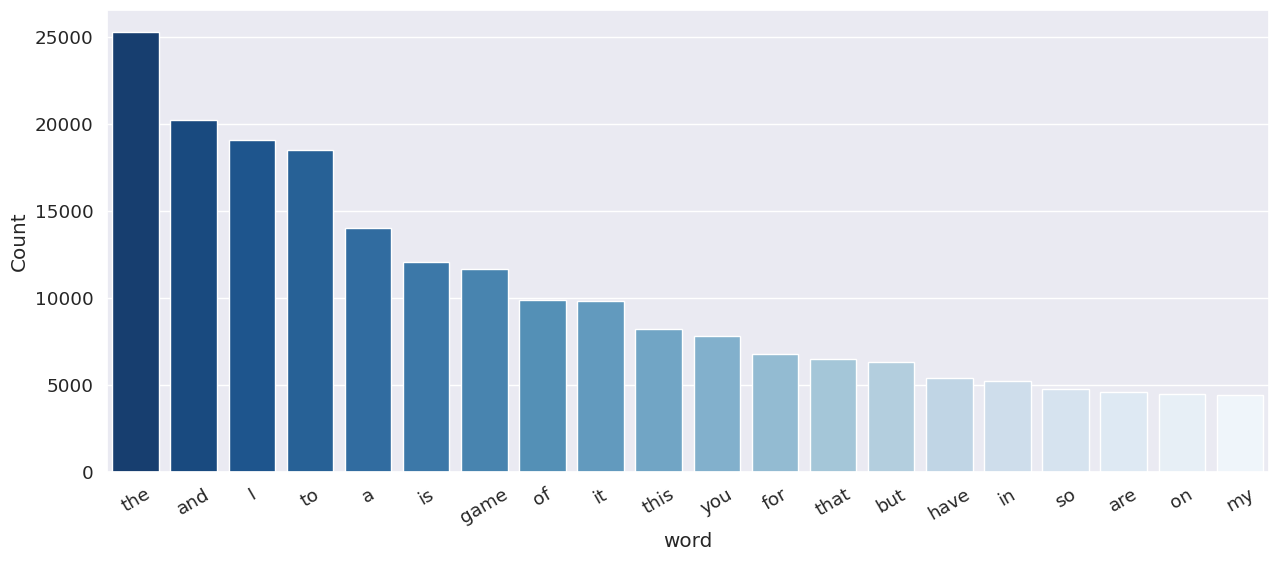

In [10]:
raw = [apple_df, google_df]
raw_df = pd.concat(raw)
freq_words(raw_df['content'])

In [11]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords

# Create a copy of the DataFrame to avoid modifying the original data
appledf_copy = apple_df.copy()

# Convert all strings to lowercase
appledf_copy.loc[:, 'content'] = appledf_copy['content'].str.lower()

# Remove all punctuation marks from the strings
appledf_copy.loc[:, 'content'] = appledf_copy['content'].apply(lambda x: re.sub('[^\w\s]','',x))

# Remove all stop words from the strings
nltk.download('stopwords')
stop_words = stopwords.words('english')
appledf_copy.loc[:, 'content'] = appledf_copy['content'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

# Remove all numbers from the strings
appledf_copy.loc[:, 'content'] = appledf_copy['content'].apply(lambda x: re.sub('\d+','',x));


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer


def preprocessing(dataframe):
    # Create a copy of the DataFrame to avoid modifying the original data
    df_copy = dataframe.copy()

    # Convert all strings to lowercase
    df_copy.loc[:, 'content'] = df_copy['content'].str.lower()

    # Remove all punctuation marks from the strings
    df_copy.loc[:, 'content'] = df_copy['content'].apply(lambda x: re.sub('[^\w\s]','',x))

    # Remove all stop words from the strings
    nltk.download('stopwords')
    stop_words = stopwords.words('english')
    df_copy.loc[:, 'content'] = df_copy['content'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

    # Perform stemming on the words in the strings
    porter_stemmer = PorterStemmer()
    df_copy.loc[:, 'content'] = df_copy['content'].apply(lambda x: ' '.join([porter_stemmer.stem(word) for word in x.split()]))

    # Remove all numbers from the strings
    df_copy.loc[:, 'content'] = df_copy['content'].apply(lambda x: re.sub('\d+','',x))

    return df_copy

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


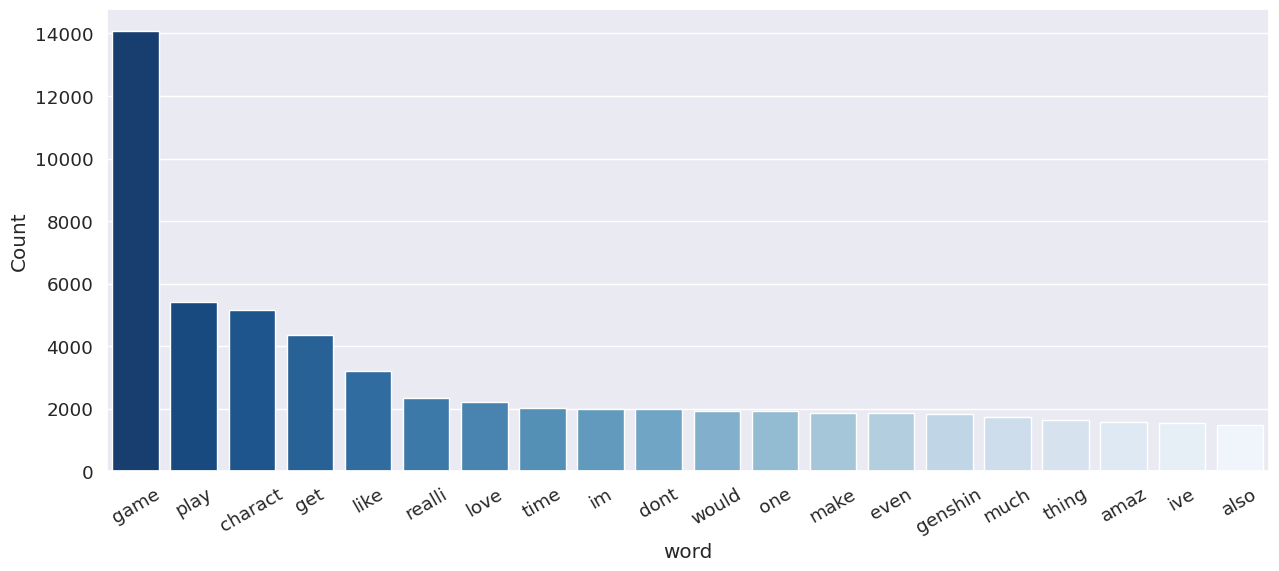

In [13]:
freq_words(preprocessing(apple_df)['content']) # apple store 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


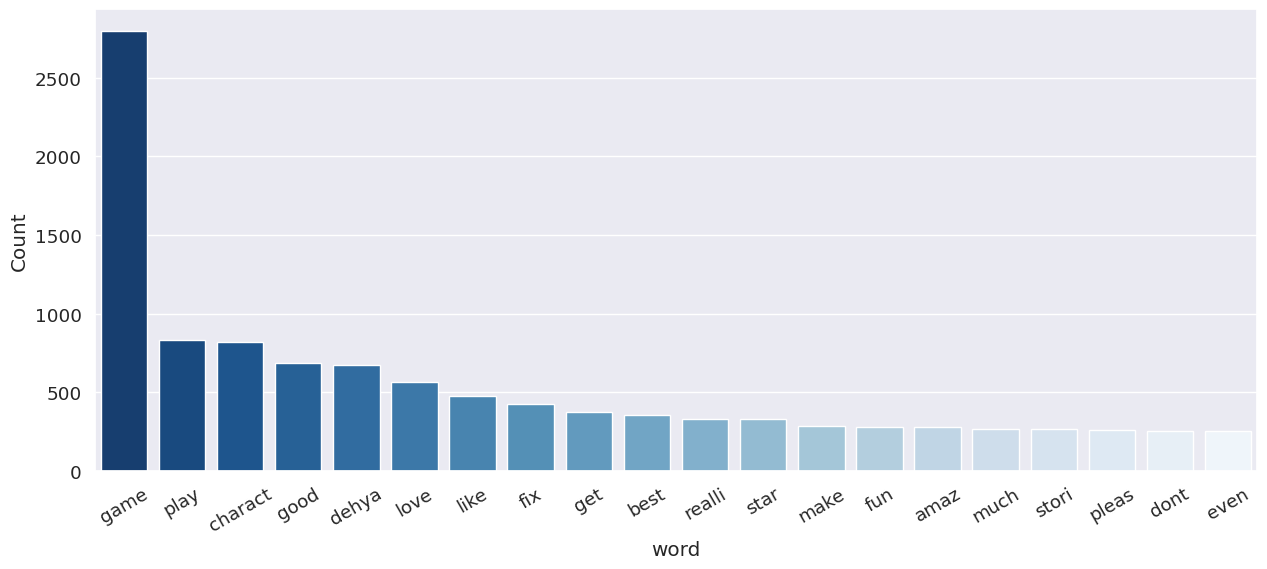

In [14]:
freq_words(preprocessing(google_df)['content']) # google play

Tokenization & Lemmatization

In [15]:
import spacy

In [16]:
nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])

In [17]:
google_reviews = preprocessing(google_df)['content']
google_token = pd.Series(google_reviews).apply(lambda x: x.split()) 

apple_reviews = preprocessing(apple_df)['content']
apple_token = pd.Series(apple_reviews).apply(lambda x: x.split()) 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [18]:
def lemmatize(texts, tags=['NOUN', 'ADJ']): # Filters nouns and adjectives
    output = []
    for sent in texts:
        doc = nlp(' '.join(sent)) 
        output.append([token.lemma_ for token in doc if token.pos_ in tags])
    return output

In [19]:
lem_reviews_google = lemmatize(google_token)
print(lem_reviews_google[0]) # print lemmatized review

['hoyovor', 'genshin', 'imagin', 'game']


In [20]:
lem_reviews_apple = lemmatize(apple_token)
print(lem_reviews_apple[0]) # print lemmatized review

['review', 'statement', 'hand', 'game', 'person', 'last', 'charact', 'environ', 'sound', 'effect', 'factor', 'game', 'reason', 'review', 'complet', 'star', 'week', 'indepth', 'play', 'certain', 'mob', 'spawn', 'type', 'exact', 'weapon', 'earn', 'wish', 'singl', 'day', 'gameplay', 'genshin', 'unwrappedgift', 'charm', 'intent', 'unwrap', 'featur', 'chest', 'exact', 'spot', 'exact', 'weapon', 'everi', 'time', 'thrill', 'token', 'whatev', 'money', 'system', 'call', 'rememb', 'time', 'someth', 'new', 'week', 'gameplay', 'lack', 'random', 'event', 'ad', 'interest', 'game', 'way']


In [21]:
# Save the lemmatized reviews because it takes so long!
import pickle
with open('../lem_reviews_google.txt', 'wb') as fp:   #Pickling
    pickle.dump(lem_reviews_google, fp)

In [22]:
import pickle
with open('../lem_reviews_apple.txt', 'wb') as fp:   #Pickling
    pickle.dump(lem_reviews_apple, fp)

In [23]:
with open('../lem_reviews_google.txt', 'rb') as fp:   # Unpickling
    google_texts = pickle.load(fp)                 # This will be used to create our corpus

In [24]:
with open('../lem_reviews_apple.txt', 'rb') as fp:   # Unpickling
    apple_texts = pickle.load(fp)      

In [25]:
newdf_1 = preprocessing(apple_df) # apple
newdf_2 = preprocessing(google_df) # google

reviews_clean_1 = []; reviews_clean_2 = [];


for i in range(len(apple_texts)):
    reviews_clean_1.append(' '.join(apple_texts[i]))

for j in range(len(google_texts)):
    reviews_clean_2.append(' '.join(google_texts[j]))

newdf_1['clean_review'] = reviews_clean_1
newdf_2['clean_review'] = reviews_clean_2

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<Axes: xlabel='score', ylabel='count'>

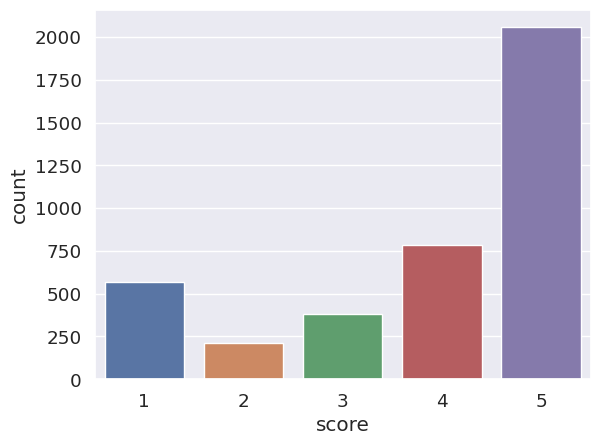

In [26]:
sns.countplot(x=newdf_1['score']) #apple

<Axes: xlabel='score', ylabel='count'>

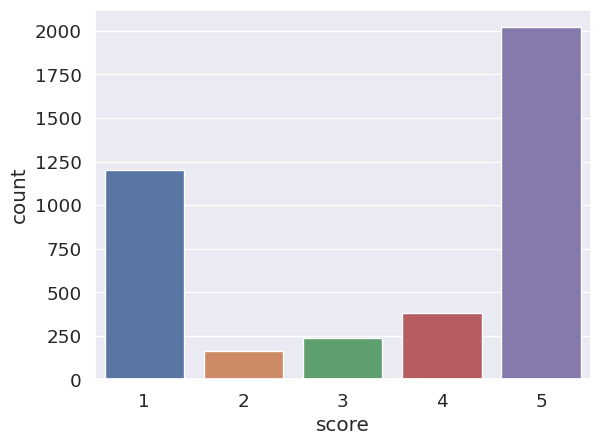

In [27]:
sns.countplot(x=newdf_2['score']) #google

We can see the number of negative reviews on Google Play is much higher than the number of negative reviews on Apple Store.

词频图

In [28]:
from textblob import TextBlob
from wordcloud import WordCloud

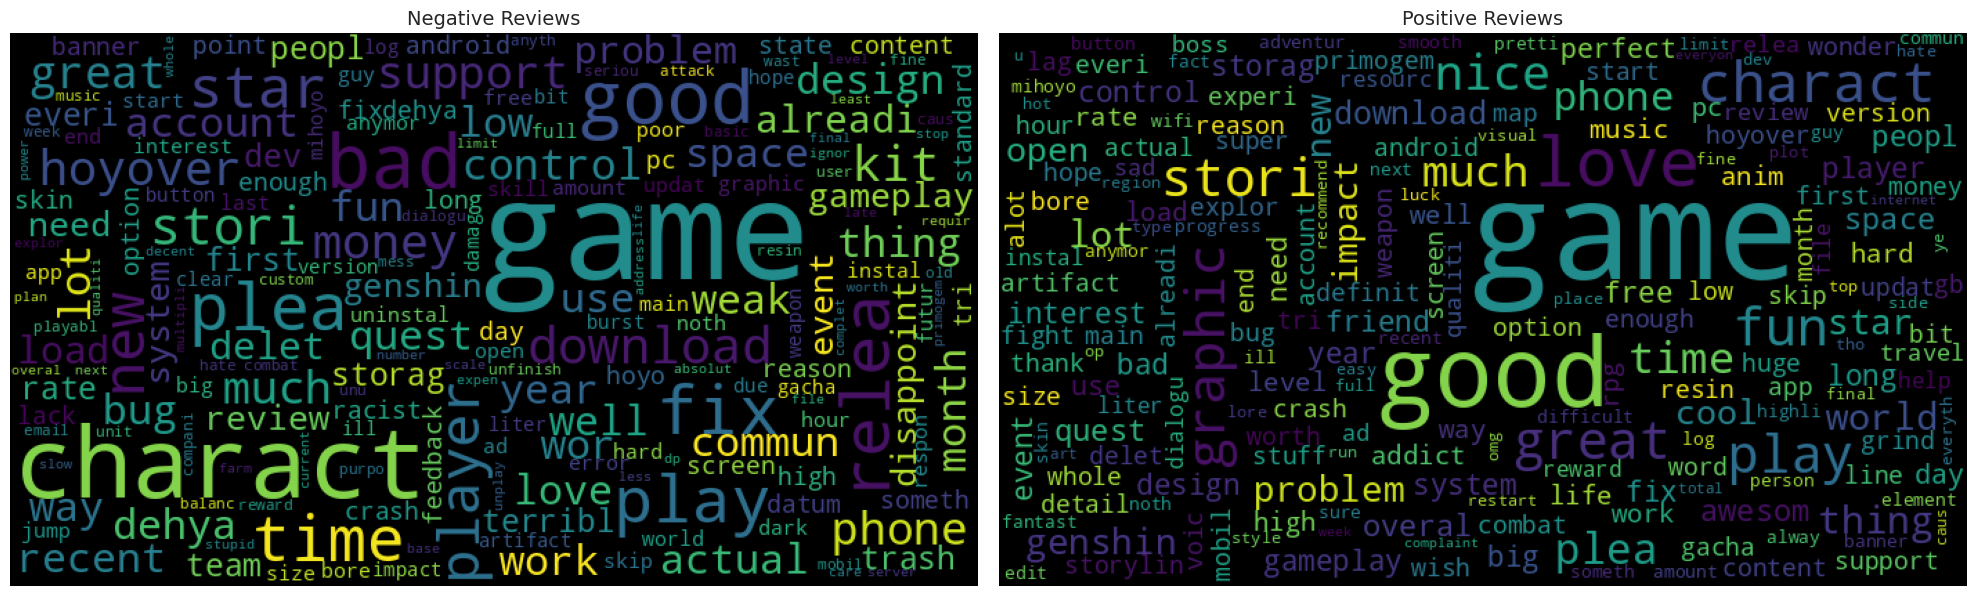

In [29]:
# google play
positive_lines = newdf_2[newdf_2['score'] >= 3]
negative_lines = newdf_2[newdf_2['score'] < 3]

fig, ax = plt.subplots(1,2, figsize=(20,7))

w_neg = WordCloud(width = 700, height = 400, random_state = 10, collocations = False,\
                  max_font_size = 100, include_numbers=True).generate(' '.join([x for x in negative_lines['clean_review']]))
w_pos = WordCloud(width = 700, height = 400, random_state = 10, collocations = False, \
                  max_font_size = 100, include_numbers=True).generate(' '.join([x for x in positive_lines['clean_review']]))

ax[0].imshow(w_neg)
ax[0].set_title("Negative Reviews", size=14)
ax[0].axis('off')

ax[1].imshow(w_pos)
ax[1].set_title("Positive Reviews", size=14)
ax[1].axis('off')
plt.tight_layout()
plt.show()

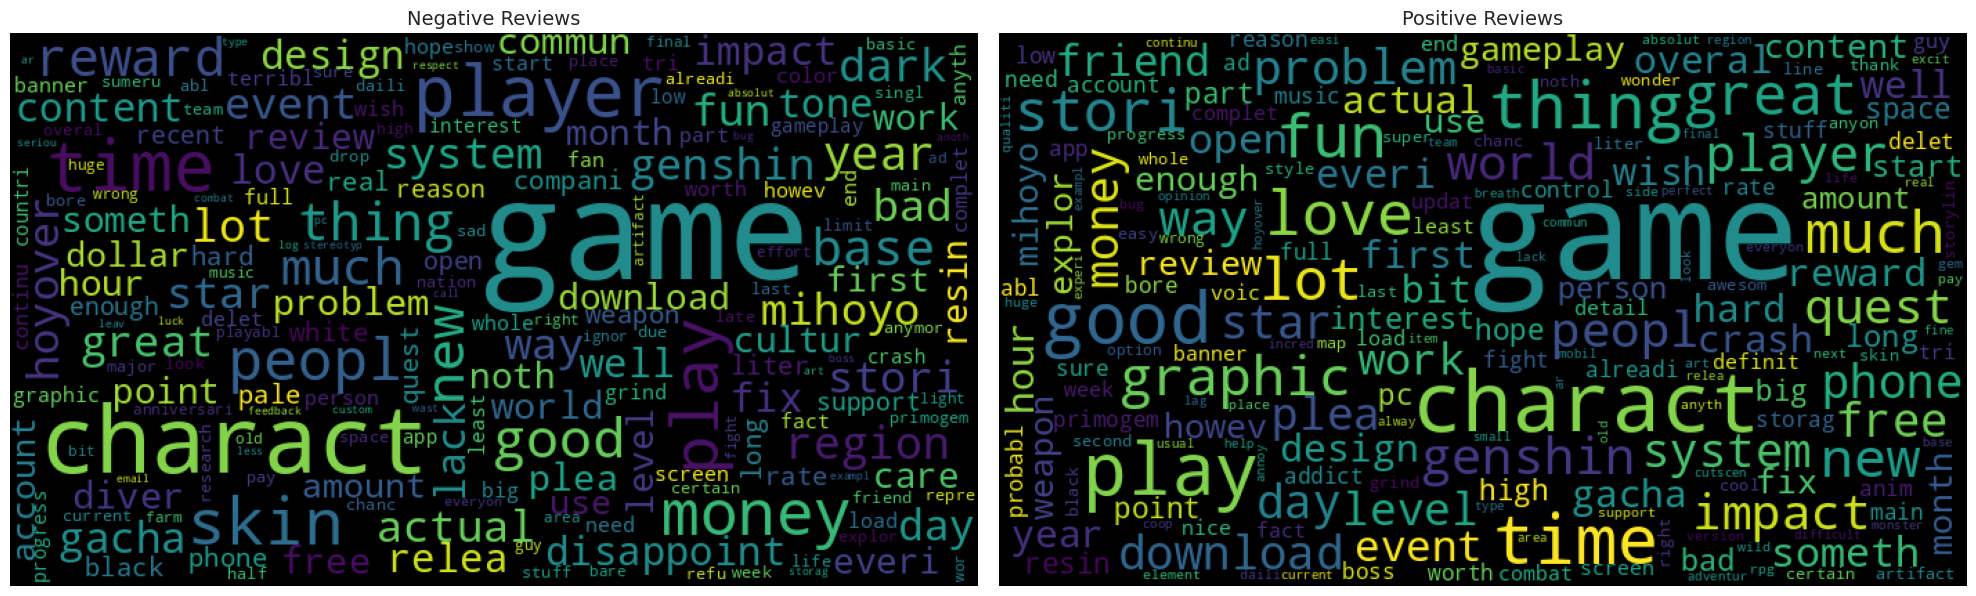

In [30]:
# apple store
positive_lines = newdf_1[newdf_1['score'] >= 3]
negative_lines = newdf_1[newdf_1['score'] < 3]

fig, ax = plt.subplots(1,2, figsize=(20,7))

w_neg = WordCloud(width = 700, height = 400, random_state = 10, collocations = False,\
                  max_font_size = 100, include_numbers=True).generate(' '.join([x for x in negative_lines['clean_review']]))
w_pos = WordCloud(width = 700, height = 400, random_state = 10, collocations = False, \
                  max_font_size = 100, include_numbers=True).generate(' '.join([x for x in positive_lines['clean_review']]))

ax[0].imshow(w_neg)
ax[0].set_title("Negative Reviews", size=14)
ax[0].axis('off')

ax[1].imshow(w_pos)
ax[1].set_title("Positive Reviews", size=14)
ax[1].axis('off')
plt.tight_layout()
plt.show()

LDA

In [31]:
# Library for unsupervised topic modeling
import gensim
from gensim import corpora
from gensim.models import CoherenceModel

In [32]:
# Creates a dictionary to hold all unique terms and assigns an index
id2word = corpora.Dictionary(google_texts)

# Converts the list of review into a Document Term Matrix
g_corpus = [id2word.doc2bow(review) for review in google_texts]

In [33]:
# Creates a dictionary to hold all unique terms and assigns an index
id2word_a = corpora.Dictionary(apple_texts)

# Converts the list of review into a Document Term Matrix
a_corpus = [id2word.doc2bow(review) for review in apple_texts]

Gensim creates a unique id for each word in the document. The produced corpus shown above is a mapping of (word_id, word_frequency).

In [34]:
# Creates object for LDA model using the gensim library
LDA = gensim.models.ldamodel.LdaModel

# Build LDA model
lda_model =LDA(corpus= g_corpus,
               id2word=id2word,
               num_topics=5, 
               random_state=100,
               update_every=1,
               chunksize=100,
               passes=10,
               alpha='auto',
               per_word_topics=True)

The model is built with 5 different topics where each topic is a combination of keywords and each keyword has a certain weight associated to the topic.

Google Play:

In [35]:
# Save the LDA model!
with open('lda_model.pkl', 'wb') as fp:   #Pickling
    pickle.dump(lda_model, fp)

In [36]:
with open('lda_model.pkl', 'rb') as fp:   # Unpickling
    lda_model = pickle.load(fp)  

In [37]:
lda_model.print_topics()

[(0,
  '0.110*"charact" + 0.047*"bad" + 0.035*"new" + 0.035*"star" + 0.031*"relea" + 0.020*"player" + 0.014*"hoyover" + 0.014*"event" + 0.013*"rate" + 0.012*"dehya"'),
 (1,
  '0.057*"much" + 0.056*"plea" + 0.031*"genshin" + 0.028*"impact" + 0.027*"fix" + 0.022*"high" + 0.022*"space" + 0.020*"storag" + 0.020*"big" + 0.019*"kit"'),
 (2,
  '0.137*"love" + 0.051*"nice" + 0.026*"control" + 0.026*"world" + 0.023*"way" + 0.023*"open" + 0.023*"support" + 0.020*"cool" + 0.016*"gacha" + 0.014*"addict"'),
 (3,
  '0.289*"game" + 0.097*"good" + 0.037*"play" + 0.029*"fun" + 0.027*"stori" + 0.027*"great" + 0.022*"time" + 0.022*"graphic" + 0.020*"thing" + 0.016*"phone"'),
 (4,
  '0.026*"quest" + 0.026*"long" + 0.020*"system" + 0.020*"overal" + 0.019*"use" + 0.016*"main" + 0.016*"banner" + 0.015*"account" + 0.015*"resin" + 0.014*"skin"')]

**Topic 3** seems to be about a positive experience and time consuming because it has terms: **fun, amazing, time**.  

In [38]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(g_corpus))  # a measure of how good the model is. Lower means better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts= google_texts, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -6.618710037918241

Coherence Score:  0.40581061824018105


In [39]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [40]:
!pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 59.3 MB/s eta 0:00:00


In [41]:
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, g_corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.378428 -0.011266       1        1  40.438743
0      0.108047 -0.311425       2        1  19.048693
1      0.094441  0.157002       3        1  15.421535
4      0.088949  0.073804       4        1  12.769333
2      0.086991  0.091884       5        1  12.321697, topic_info=        Term         Freq        Total Category  logprob  loglift
0       game  2591.000000  2591.000000  Default  30.0000  30.0000
55      love   376.000000   376.000000  Default  29.0000  29.0000
52      good   872.000000   872.000000  Default  28.0000  28.0000
30   charact   474.000000   474.000000  Default  27.0000  27.0000
43      much   194.000000   194.000000  Default  26.0000  26.0000
..       ...          ...          ...      ...      ...      ...
131     line    19.886712    20.615219   Topic5  -4.9240   2.0578
185     last    17.364208    18.091481   Topic5  -5.0596   2.0528
631  fantast    17.260442    17.983665   Topic5  -5.0656   2.0528
304    whole    17.170884    17.894148   Topic5  -5.0708   2.0525
112      map    16.026291    16.747806   Topic5  -5.1398   2.0498

[180 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
150       4  0.987323   account
115       1  0.994218    actual
249       3  0.975395        ad
356       5  0.983848    addict
1016      5  0.990859  adventur
...     ...       ...       ...
180       2  0.974769       wor
194       1  0.979428      work
206       5  0.987666     world
84        2  0.956025     worth
181       1  0.993028      year

[151 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 1, 2, 5, 3])

- Topic 1 is the most prevalent as it has the largest bubble

- This model may not be the best to describe the topics from the reviews as there are overlapping bubbles (Topics 4 and 5). 

    - This may indicate that there are only 3 definitive topics

In [42]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    dictionary: Gensim dictionary; corpus: Gensim corpus
    texts: List of input texts; limit: Max num of topics

    Returns:
    model_list: List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = LDA(corpus= g_corpus,
               id2word=id2word,
               num_topics= num_topics, 
               random_state=100,
               update_every=1,
               chunksize=100,
               passes=10,
               alpha='auto',
               per_word_topics=True)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [43]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=g_corpus,\
                                                        texts=google_texts, start=2, limit=20, step=2)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [44]:
# Save the LDA model list
with open('lda_model_list.pkl', 'wb') as fp:   #Pickling
    pickle.dump(model_list, fp)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [45]:
with open('lda_model_list.pkl', 'rb') as fp:   # Unpickling
    model_list = pickle.load(fp) 

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [46]:
# Save the coherence values
with open('coherence_values.pkl', 'wb') as fp:   #Pickling
    pickle.dump(coherence_values, fp)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [47]:
with open('coherence_values.pkl', 'rb') as fp:   # Unpickling
    coherence_values = pickle.load(fp)   

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


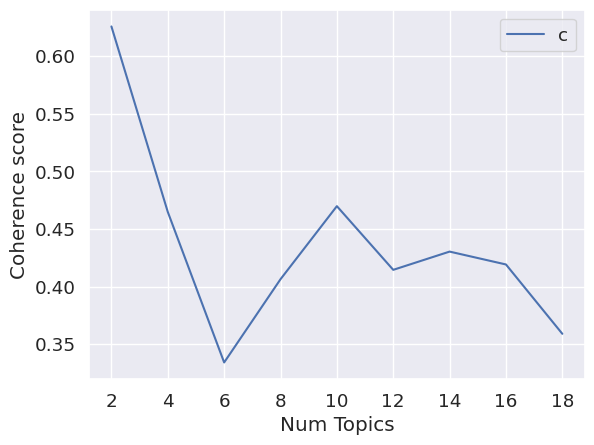

In [48]:
# Show graph
limit=20; start=2; step=2;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [49]:
bestlda_model = LDA(corpus= g_corpus,
               id2word=id2word,
               num_topics=2, 
               random_state=100,
               update_every=1,
               chunksize=100,
               passes=10,
               alpha='auto',
               per_word_topics=True)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [50]:
bestlda_model.print_topics()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.067*"charact" + 0.029*"bad" + 0.022*"new" + 0.021*"star" + 0.019*"relea" + 0.013*"fix" + 0.013*"player" + 0.010*"well" + 0.009*"money" + 0.009*"kit"'),
 (1,
  '0.164*"game" + 0.055*"good" + 0.026*"love" + 0.021*"play" + 0.017*"fun" + 0.015*"stori" + 0.015*"great" + 0.013*"time" + 0.013*"much" + 0.013*"plea"')]

In [51]:
bestlda_model_2 = LDA(corpus= g_corpus,
               id2word=id2word,
               num_topics=10, 
               random_state=100,
               update_every=1,
               chunksize=100,
               passes=10,
               alpha='auto',
               per_word_topics=True)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [52]:
bestlda_model_2.print_topics()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.096*"bad" + 0.072*"new" + 0.030*"charact" + 0.026*"rate" + 0.025*"dehya" + 0.025*"player" + 0.023*"content" + 0.021*"wor" + 0.020*"version" + 0.020*"bit"'),
 (1,
  '0.052*"op" + 0.041*"experi" + 0.033*"balanc" + 0.029*"monster" + 0.026*"job" + 0.026*"excit" + 0.022*"gem" + 0.018*"primo" + 0.018*"tbh" + 0.015*"charect"'),
 (2,
  '0.195*"plea" + 0.151*"nice" + 0.067*"kit" + 0.029*"hour" + 0.024*"gb" + 0.023*"least" + 0.022*"reward" + 0.016*"import" + 0.014*"art" + 0.014*"increa"'),
 (3,
  '0.404*"love" + 0.028*"guy" + 0.021*"full" + 0.017*"recommend" + 0.016*"commun" + 0.016*"sometim" + 0.015*"dialogu" + 0.014*"tho" + 0.013*"attack" + 0.012*"ye"'),
 (4,
  '0.045*"grind" + 0.045*"awesom" + 0.041*"updat" + 0.041*"bore" + 0.041*"day" + 0.035*"bug" + 0.031*"fight" + 0.029*"uninstal" + 0.026*"probabl" + 0.022*"hoyo"'),
 (5,
  '0.053*"year" + 0.035*"month" + 0.033*"main" + 0.031*"actual" + 0.030*"account" + 0.030*"end" + 0.028*"combat" + 0.026*"size" + 0.024*"disappoint" + 0.023*"scr

In [53]:
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()
vis_2 = pyLDAvis.gensim_models.prepare(bestlda_model_2, g_corpus, id2word)
vis_2

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6     -0.429937 -0.043578       1        1  45.682837
9     -0.007208  0.410075       2        1  12.306544
0     -0.081146 -0.073678       3        1   9.370667
5      0.076290 -0.040193       4        1   6.574106
7      0.073656 -0.039048       5        1   6.518555
8      0.066457 -0.034860       6        1   6.516599
2      0.075103 -0.043535       7        1   4.277254
3      0.073775 -0.042529       8        1   4.075822
4      0.080877 -0.046719       9        1   3.955476
1      0.072133 -0.045935      10        1   0.722140, topic_info=           Term         Freq        Total Category  logprob  loglift
0          game  2862.000000  2862.000000  Default  30.0000  30.0000
52         good   898.000000   898.000000  Default  29.0000  29.0000
55         love   366.000000   366.000000  Default  28.0000  28.0000
44         plea   185.000000   185.000000  Default  27.0000  27.0000
40          fun   272.000000   272.000000  Default  26.0000  26.0000
...         ...          ...          ...      ...      ...      ...
1673   somewher     0.079809     1.233616  Topic10  -7.6053   2.1926
526      script     0.055920     0.882880  Topic10  -7.9610   2.1714
2692      figur     0.064575     1.109017  Topic10  -7.8171   2.0873
2693    paralyz     0.064575     1.109017  Topic10  -7.8171   2.0873
2723  midgarbag     0.066435     1.185068  Topic10  -7.7887   2.0494

[335 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
383       5  0.900282        abl
509       5  0.936789    absolut
150       4  0.981784    account
115       4  0.986274     actual
249       4  0.989047         ad
...     ...       ...        ...
206       1  0.991034      world
2604     10  0.408997  worthless
515       5  0.978185      wrong
64        8  0.911046         ye
181       4  0.994240       year

[294 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 10, 1, 6, 8, 9, 3, 4, 5, 2])

!!!need to edit!!!


Summary
Topics 1,2,3,4,9,13 have reviews expressing their love for 

Highlights:

There are many rewarding challenges
The game has improved greatly over the years
Very addictive game and great time killer with beautiful graphics
Topics 7,8,11,12,14 have pessimistic reviews.

Highlights:

Losing because game is rigged
Buying more chips make you lose more
Bad players always go all in (i.e., Bingo player)


Topics 5,6,10 focus on the game's bugs, fixes, and enhancements

Free chip ads and free spins not working properly
Too many annoying ads
Event updates cause blank screens

Apple Store

In [54]:
model_list_a, coherence_values_a = compute_coherence_values(dictionary=id2word_a, corpus=a_corpus,\
                                                        texts=apple_texts, start=2, limit=20, step=2)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [55]:
# Save the LDA model list
with open('lda_model_list_a.pkl', 'wb') as fp:   #Pickling
    pickle.dump(model_list_a, fp)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [56]:
with open('lda_model_list_a.pkl', 'rb') as fp:   # Unpickling
    model_list_a = pickle.load(fp) 

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [57]:
# Save the coherence values
with open('coherence_values_a.pkl', 'wb') as fp:   #Pickling
    pickle.dump(coherence_values_a, fp)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [58]:
with open('coherence_values_a.pkl', 'rb') as fp:   # Unpickling
    coherence_values_a = pickle.load(fp)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


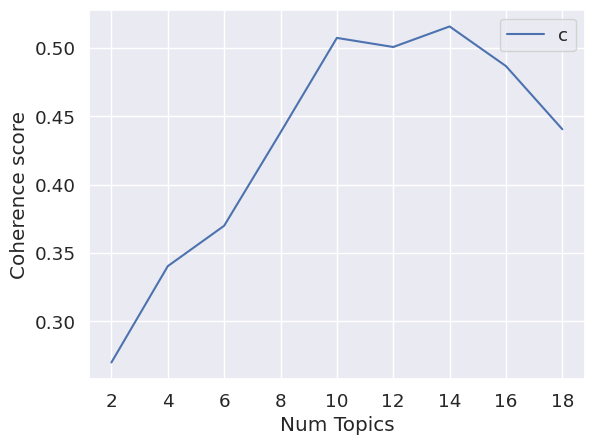

In [59]:
# Show graph
limit = 20; start = 2; step = 2;
x = range(start, limit, step)
plt.plot(x, coherence_values_a)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

best number of topic: 14

In [60]:
bestlda_model_a = LDA(corpus= a_corpus,
               id2word=id2word,
               num_topics=14, 
               random_state=100,
               update_every=1,
               chunksize=100,
               passes=10,
               alpha='auto',
               per_word_topics=True)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [61]:
bestlda_model_a.print_topics()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.122*"custom" + 0.107*"choo" + 0.086*"dog" + 0.065*"interact" + 0.051*"femal" + 0.050*"step" + 0.044*"male" + 0.035*"boy" + 0.033*"cat" + 0.024*"card"'),
 (1,
  '0.000*"lifespan" + 0.000*"comfort" + 0.000*"e" + 0.000*"tabi" + 0.000*"rampag" + 0.000*"snap" + 0.000*"audienc" + 0.000*"degenar" + 0.000*"innov" + 0.000*"lunch"'),
 (2,
  '0.115*"monster" + 0.080*"aspect" + 0.061*"twin" + 0.059*"water" + 0.055*"cloth" + 0.049*"hair" + 0.046*"defeat" + 0.040*"troubl" + 0.038*"fli" + 0.036*"glider"'),
 (3,
  '0.171*"fight" + 0.139*"boss" + 0.077*"mission" + 0.065*"sometim" + 0.052*"attack" + 0.050*"action" + 0.029*"entertain" + 0.023*"quick" + 0.023*"view" + 0.022*"extrem"'),
 (4,
  '0.100*"money" + 0.075*"star" + 0.066*"system" + 0.065*"free" + 0.062*"gacha" + 0.047*"charact" + 0.045*"wish" + 0.036*"weapon" + 0.033*"rate" + 0.029*"gem"'),
 (5,
  '0.278*"quest" + 0.050*"coop" + 0.034*"side" + 0.033*"inazuma" + 0.031*"mode" + 0.031*"chest" + 0.030*"liyu" + 0.030*"job" + 0.026*"commiss" 

In [62]:
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()
vis_3 = pyLDAvis.gensim_models.prepare(bestlda_model_a, a_corpus, id2word)
vis_3

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6      0.131920  0.089696       1        1  77.213518
4      0.301429  0.145399       2        1   6.894236
10     0.192424 -0.412831       3        1   4.699609
7      0.172561  0.084225       4        1   2.436434
8      0.175178  0.125565       5        1   2.185392
5      0.024622 -0.099943       6        1   2.161636
11     0.004312  0.012357       7        1   1.378762
3     -0.096571 -0.019354       8        1   1.086957
9     -0.121386 -0.008857       9        1   0.792636
2     -0.148999  0.006862      10        1   0.576964
0     -0.154014  0.009937      11        1   0.413438
13    -0.164402  0.020913      12        1   0.125246
1     -0.158537  0.023015      13        1   0.017628
12    -0.158537  0.023015      14        1   0.017545, topic_info=        Term          Freq         Total Category  logprob  loglift
30   charact   3097.000000   3097.000000  Default  30.0000  30.0000
0       game  15309.000000  15309.000000  Default  29.0000  29.0000
90    player   1031.000000   1031.000000  Default  28.0000  28.0000
203    quest    784.000000    784.000000  Default  27.0000  27.0000
200    money   1006.000000   1006.000000  Default  26.0000  26.0000
..       ...           ...           ...      ...      ...      ...
25     sound      0.008164     73.428685  Topic14  -7.9381  -0.4561
26    travel      0.008164     93.935812  Topic14  -7.9381  -0.7024
27      nice      0.008164    245.859177  Topic14  -7.9381  -1.6646
28    attack      0.008164     75.306220  Topic14  -7.9381  -0.4814
29      auto      0.008164     20.106272  Topic14  -7.9381   0.8391

[567 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
149      12  0.857737     abyss
563       8  0.980126    action
115       1  0.983987    actual
115       4  0.012482    actual
997       5  0.978607  advertis
...     ...       ...       ...
218       2  0.997489      wish
194       1  0.999027      work
206       1  0.999261     world
181       1  0.789776      year
181       5  0.208231      year

[389 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 5, 11, 8, 9, 6, 12, 4, 10, 3, 1, 14, 2, 13])

!! need to edit!!!


Summary Topics 1,2,3,4,9,13 have reviews expressing their love for

Highlights:

There are many rewarding challenges The game has improved greatly over the years Very addictive game and great time killer with beautiful graphics Topics 7,8,11,12,14 have pessimistic reviews.

Highlights:

Losing because game is rigged Buying more chips make you lose more Bad players always go all in (i.e., Bingo player)

Topics 5,6,10 focus on the game's bugs, fixes, and enhancements

Free chip ads and free spins not working properly Too many annoying ads Event updates cause blank screens

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Prediction

In [63]:
import joblib; import re; import string

import numpy as np; import pandas as pd

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, cohen_kappa_score, f1_score, classification_report
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.naive_bayes import MultinomialNB

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [64]:
frames = [newdf_1, newdf_2]
  
full_df = pd.concat(frames)
display(full_df)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,content,score,clean_review
0,sum entir review one statement hand one polish...,4,review statement hand game person last charact...
1,rememb start genshin wondrou everyth new exit ...,5,rememb start new exit start rememb enough egg ...
2,okay love genshin impact honestli addict l pla...,5,love impact addict l play great game realli fu...
3,im go start say love game kept boredom pandem ...,5,love game lot howev major problem messag playe...
4,titl review say let start day instal genshin i...,5,day instal genshin impact long time creat acco...
...,...,...,...
3995,one make dehya trash,1,dehya trash
3996,bad bad garbag,1,bad bad garbag
3997,good,5,good
3998,buff deyha,1,deyha


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: xlabel='score', ylabel='count'>

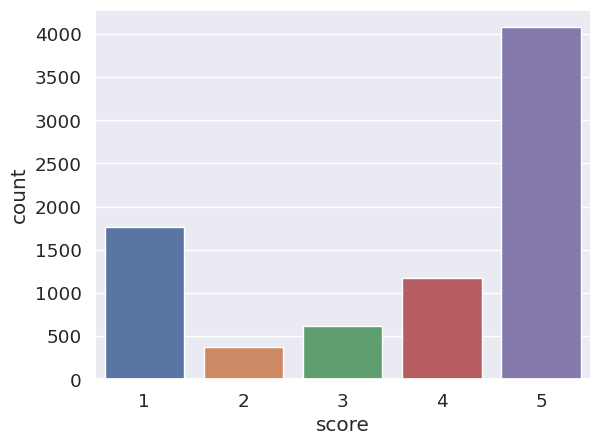

In [65]:
sns.countplot(x=full_df['score'])

In [66]:
df_train, df_test = train_test_split(full_df, test_size = 0.20) 

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [67]:
X_train, X_test, y_train, y_test = train_test_split(full_df['content'],\
                                                    full_df['score'], test_size=0.2)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [68]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfid = TfidfVectorizer()
train_tfid_matrix = tfid.fit_transform(X_train)
test_tfid_matrix = tfid.transform(X_test)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [69]:
# Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [70]:
pickle.dump(tfid, open('tfidf.pkl', 'wb'))

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [71]:
models = [KNeighborsClassifier(),
          MultinomialNB(),
          DecisionTreeClassifier(),
          RandomForestClassifier(),
          SVC(),
          LogisticRegression(max_iter=1000)]

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [72]:
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
import random
accuracy = []


for model in models:
    random.seed(123)
    cross_val = cross_val_score(model, train_tfid_matrix, y_train, 
                                scoring='accuracy', cv=StratifiedKFold(5)).mean()
    accuracy.append(cross_val)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [73]:
models_name = ['KNeighborsClassifier', 'MultinomialNB', 'DecisionTreeClassifier',\
               'RandomForestClassifier', 'SVC', 'LogisticRegression',]

acc = pd.DataFrame({'Model': models_name, 'Accuracy': accuracy})
acc

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Model,Accuracy
0,KNeighborsClassifier,0.547656
1,MultinomialNB,0.601719
2,DecisionTreeClassifier,0.550312
3,RandomForestClassifier,0.642187
4,SVC,0.655625
5,LogisticRegression,0.658594


LogisticRegression gets the highest accuracy. 

Let's compare the results 
1. LogisticRegression
2. SVC




In [74]:
X_train, X_test, y_train, y_test = train_test_split(full_df['content'],\
                                                    full_df['score'], test_size=0.2)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [75]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfid = TfidfVectorizer()
train_tfid_matrix = tfid.fit_transform(X_train)
test_tfid_matrix = tfid.transform(X_test)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


CountVectorizer turns text into numerical features. Here's what's happening in the code above:

Lines 1 to 4: You use CountVectorizer to build a bag of words representation of clean_text. You specify two parameters: ngram_range and stop_words. ngram_range is the range of n-grams that the function will use. An n-gram is a sequence of n words. (1, 3) means that the function will use sequences of 1, 2, and 3 words to generate the counts. stop_words is a list of words that the function will ignore. In this case, the list "english" means that the function will ignore the most common words in English. Lines 6 and 7: You generate the matrices of token counts for your training and testing set and save them into X_train and X_test. Lines 9 and 10: You save the response variable from the training and testing set into y_train and y_test.

In [76]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix
import random
random.seed(123)
# 1. LogisticRegression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(train_tfid_matrix, y_train)
y_pred_1 = log_reg.predict(test_tfid_matrix)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [77]:
print(accuracy_score(y_test, y_pred_1))
print(f1_score(y_test, y_pred_1,average='weighted'))
print(recall_score(y_test, y_pred_1, average='weighted'))
print(precision_score(y_test, y_pred_1,average='weighted'))

0.666875
0.6070955453726574
0.666875
0.582872159217645


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [78]:
random.seed(123)
# 2. svc
svc = SVC()
svc.fit(train_tfid_matrix, y_train)
y_pred_2 = svc.predict(test_tfid_matrix)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [79]:
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes, normalize=False,
                          title = 'Confusion matrix',
                          cmap = plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title); plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment = "center",
                 color= "white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Confusion matrix, without normalization


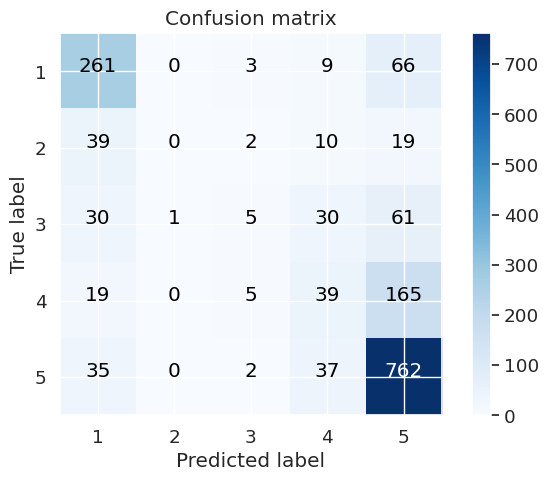

In [80]:
from sklearn import metrics
import itertools
cm = metrics.confusion_matrix(y_test, y_pred_1)
plot_confusion_matrix(cm, classes=[1,2,3,4,5])

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Confusion matrix, without normalization


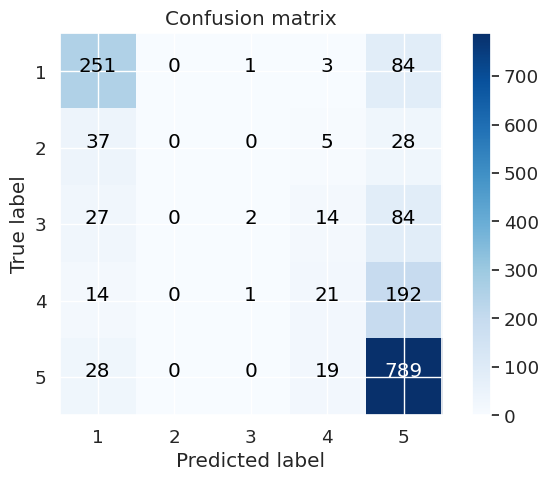

In [81]:
from sklearn import metrics
import itertools
cm_2 = metrics.confusion_matrix(y_test, y_pred_2)
plot_confusion_matrix(cm_2, classes=[1,2,3,4,5])

We found it's quite hard to determine whether the rating = 4 and rating = 5. Also, the number of each class is unbalanced, it;...

It is clearly observable that all
the classifiers predicts 1 star and 5 star reviews with much higher accuracy than the neutral reviews (3 star).

In [82]:
from sklearn.metrics import roc_curve, auc

def plot_multiclass_roc(clf, X_test, y_test, n_classes, figsize=(9, 6)):
    y_score = clf.decision_function(X_test)

    # structures
    fpr = dict(); tpr = dict(); roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0]); ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('ROC curve')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC (area = %0.2f) for rating = %i' % (roc_auc[i], i+1))
    ax.legend(loc = "best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


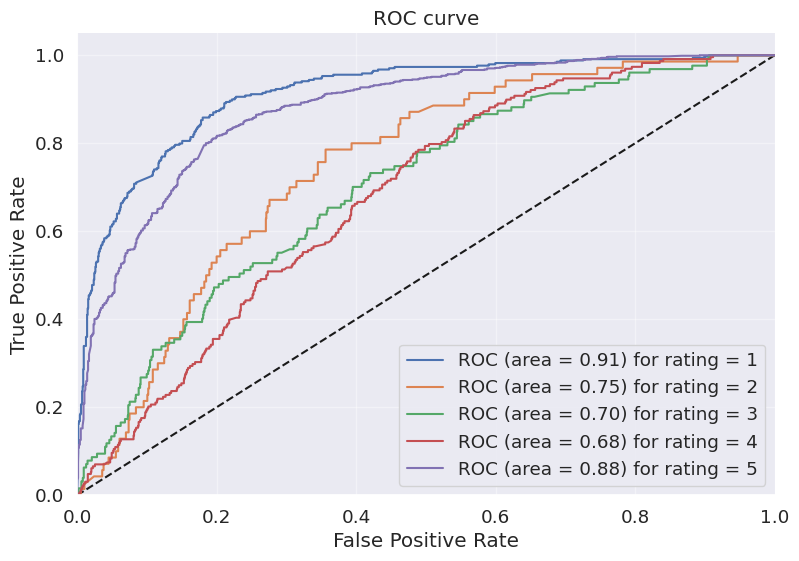

In [83]:
plot_multiclass_roc(log_reg, test_tfid_matrix,\
                    y_test, n_classes=5, figsize=(9, 6))

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


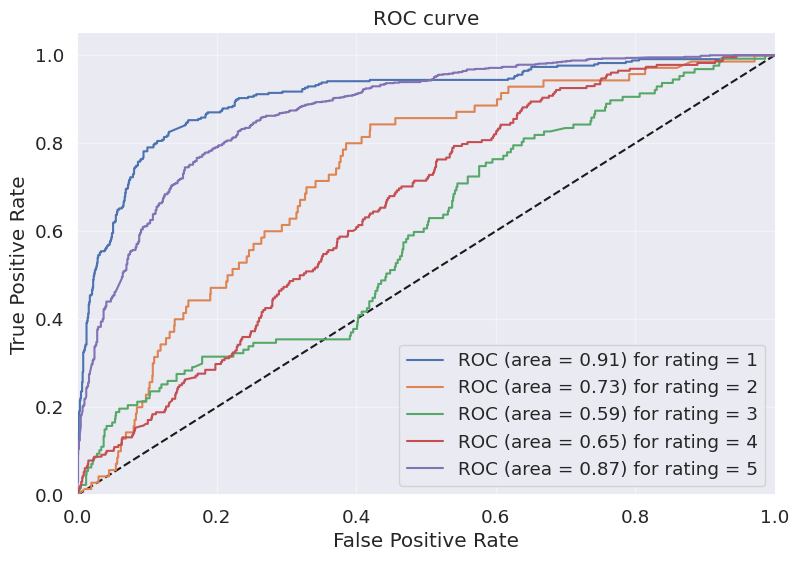

In [84]:
plot_multiclass_roc(svc, test_tfid_matrix,\
                    y_test, n_classes=5, figsize=(9, 6))

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Neural Network Model

But why stop with something like Naive Bayes. The world of NLP is being overrun with word2vec embeddings, neural network architectures and a whole host of novel techniques. Let's explore a couple of these newer ideas and see what sort of predictions we can come up with.

### Embeddings and Tokens

The first big development in NLP that I want to look at are embeddings or word vectors. The basic Word2Vec technique attempts to represent a words meaning by counting the context in which a word appears. Since we are dealing with natural language, this would be many thousands of different contexts, resulting in vectors with potentially millions of dimensions. As an example, you could see 'it' appear contextually as 'it was', 'it wasn't', 'it became', and 'it sat' just to name a few. Since it *doesn't* appear in thousands of other contexts, what we'd end up getting is a long vector  of \[0, 1, 0, 0, 0, 0, 2, 0, ...] where there is a 0 in contexts where that word wasn't seen and a count with the number of times that word appeared in the other spots. 

It turns out that you can represent most of this information (or vector space) with far fewer dimensions so word vectors use dimensionality reduction techniques to reduces the number of dimensions down to, say, 25-300. For a more detailed overview of the basic idea, this [gist](https://gist.github.com/aparrish/2f562e3737544cf29aaf1af30362f469) is a good code focused walk through.

This might not, initially, seem all that useful, but what these word vectors do is tell us the relationship between words. Since they are vectors, we can perform arithmetic with them. The canonical example goes something like this: what do you get if you take ***queen*** and subtract ***woman***? A ***king***. Or what about if you add ***frozen*** to ***water***? You get ***ice***!  There is something really cool about this to me and I'd encourage you to explore the concept yourself to learn more.

The bad news is that training your own word vectors requires an enormous amount of text data. Luckily, there are several very good precomputed vectors(or embeddings) which are freely distributed and available for modeling. Here I'll be using [GloVe](https://nlp.stanford.edu/projects/glove/) embeddings taken from the twitter corpus. There are GloVe embeddings from other sources, such as Wikipedia or the common crawl, as well as other embeddings like FastText. Since I know from exploration that reviews often contain non-standard english and unusual punctuation/language I thought twitter seemed fitting. It performed the best out of the embeddings I tried, but depending on your data set another embedding may perform better. If you want to get really fancy you can combine embeddings--that seems to be very common and very powerful if Kaggle competitions are any indication.

My twitter embeddings are 200 dimensional, so I need to set my embedding size equal to that number of dimensions. This will be used to build my embedding matrix.

Now I need to tokenize my data. Just like above with Naive Bayes, I'm using the defaults and splitting into individual words, but here I have to take the additional step of padding the vectors so that they are all equal length. Keras requires this, and it's easy to do with their pad_sequences method.

Now I need to read in my embeddings. One issue that can come up when using pretrained embeddings is that if a word didn't appear in the embedding training data set, then there is no vector for it in the embedding file. You can randomly initialize vectors for words that don't appear in your embedding vector or you could use multiple embedding files(like glove + fasttext) to attempt to cover a larger vocabulary. Here I'm actually going to just leave them as zero vectors because I'm only using the twitter embeddings as a starting point and I will allow tuning of them while building the model. This resulted in the best model in my specific case, but you should try out several methods and see what works best for a new data set.

Out of curiosity I appended all the words that weren't present in the twitter embeddings to a list so I could examine them. A lot of the words seem pretty specific to restaurant reviews. There are many restaurant names, food names and words that just probably don't appear that often in tweets.  One area where I could definitely squeeze out some more accuracy is by fixing all the contractions that are missing from the embedding vocabulary. I could take this even further and stem and lemmatize the tokens and probably improve accuracy even more.  Ultimately, since I am not competing and really trying to eek out thousandths of a decimal point improvement, I'll leave it as is. Just keep in mind there is lots of room for improvement to be had by playing around with this embedding matrix and messing around with word engineering.

#### Specify Model

One thing I found after doing a *ton* of research and looking at many, many, many Kaggle competitions is that the specs of the neural network itself are often less important than other components of the model pipeline. In this case, I tried combinations of LSTM(long short-term memory) layers, GRU(gated recurrent units) layers, adding multiple dense layers, stacking multiple GRU or LSTM layers, bidirectional vs standard layers, etc and all had pretty similar levels of performance. I ended up going with an architecture that was successfully applied in the Kaggle Toxic Comment Classification [competition](https://www.kaggle.com/c/jigsaw-toxic-comment-classification-challenge/discussion/52644). I used that structure as my baseline and nothing I tried beat it by much. I did have a double GRU followed by a huge dense layer structure that performed marginally better, but took quite a bit longer to train so I abandoned it.

I won't go into much detail about LSTM vs GRU because, frankly, I'm not an expert and I learned most of what I know from several [*excellent*](http://www.wildml.com/2015/10/recurrent-neural-network-tutorial-part-4-implementing-a-grulstm-rnn-with-python-and-theano/) [blog](https://towardsdatascience.com/understanding-gru-networks-2ef37df6c9be) [posts](http://colah.github.io/posts/2015-08-Understanding-LSTMs/). 

Just a couple implementation notes: I set trainable to true even though I am using pretrained embeddings. This resulted in a higher accuracy. This is probably related to fine tuning the vectors and training vectors for the numerous words that didn't appear in the glove twitter embeddings. I also set up earlystop and checkpoint callbacks. Early stop will automatically stop training the model after your desired metric is no longer improving. This was really handy because I could just set the number of epochs to a relatively high number and let keras automatically stop when overfitting is likely occurring. Thanks to checkpoint, the weights from the best epoch are saved.

#### Fit Model

Here, I finally fit the model. I use a small validation set of about 28,000 reviews to evaluate model accuracy as I'm training. 

#### Model Evaluation

Our model is by no means perfect, but the neural network approach improved precision and recall by about 10% each. That's pretty substantial. Perhaps most significantly, 2-4 star reviews saw the biggest improvement and those were particularly weak areas for the naive bayes model. Our accuracy also improved about 2.5% and is up to nearly 88% now. This should be plenty accurate for my web application.

#### Saving Model

Since the neural network takes a decent amount of time to train, saving the model is essential. Normally I'd save models as a pickle file, but the Keras documentation doesn't recommend that. Luckily, Keras provides a pretty easy scheme to save both model weights and model architecture. 

#### Improving the model

There's tons of room for improvement here. Some of the low hanging fruit would be:

* ***Specifying better embeddings*** Combining glove and fasttext embeddings to get better coverage would be a good start, but there's plenty of other tweaks to do here. I could encode seemingly important text features--such as overuse of capital letters. I could even get really ambitious and normalize text by fixing things like spelling errors. I think is probably the single largest area for improvement.

* ***Train/Test-time augmentation(TTA)*** This is something I heard about on Kaggle and really wanted to try, but I didn't have time. The basic idea is to use machine translation to translate the reviews to, say, French and then back to English. This will alter the text of the review effectively giving you more data. This should be useful in reducing overfitting and allowing you to train a better model. Additionally, the machine translation will often take care of simple text correction which is helpful for accuracy. This technique was applied very successfully in some recent Kaggle classification competitions.

* ***Ensembling models together*** It's a huge simplification, but the best model is often a combination of several models.  A starting point would be combining the Naive Bayes and LSTM/GRU models through simple averaging. You can expand this a huge amount, but I'd have to set up a very rigorous cross validation scheme to avoid massively overfitting.

* ***Using newer architectures*** Recently, capsule networks and special types of convolutional neural networks--typical used on image classification--have been shown to be highly effective in NLP problems. These models are high performing on their own, but since they are significantly different architectures from the RNN's I've used above, they are also promising candidates for ensembling.

But, again, this isn't about building the best possible model. I just want a 'good' model that I can use in my simple application. I'd encourage those interested to try some of the improvements listed above and share the results!

## New


In [85]:
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
 
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline 
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Embedding, Conv1D,MaxPooling1D, Flatten, Dense,Dropout,LSTM,Bidirectional
from keras.optimizers import RMSprop

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Tokenizing

In [86]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(10_000 , oov_token='<OOV>')

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [87]:
tokenizer.fit_on_texts(X_train)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [88]:
train_sequences = tokenizer.texts_to_sequences(X_train) 

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [89]:
test_sequences = tokenizer.texts_to_sequences(X_test) 

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [90]:
average_len = np.mean([len(seq) for seq in train_sequences])
average_len

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


41.1703125

In [91]:
max_len = 100

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [92]:
train_pad = pad_sequences(train_sequences, maxlen= max_len)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [93]:
test_pad =  pad_sequences(test_sequences, maxlen= max_len)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [94]:
from tensorflow.keras.utils import to_categorical
train_label = to_categorical(y_train)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [95]:
test_label =  to_categorical(y_test)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [96]:
train_label.shape # only 5 values 

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(6400, 6)

In [97]:
train_label = train_label[: , 1:]

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [98]:
test_label = test_label[: , 1:]

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



# Modeling 

In [99]:
tf.keras.backend.clear_session ()

model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(10_000, 32),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences = True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)), # GRU?
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dropout(.2),
    tf.keras.layers.Dense(5 , activation = 'softmax')
])

model.summary()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          320000    
                                                                 
 bidirectional (Bidirectiona  (None, None, 64)         16640     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              66048     
 nal)                                                            
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 512)               66048     
                                                        

In [100]:
random.seed(123)
model.compile(loss  = tf.keras.losses.categorical_crossentropy,\
              optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0005), metrics = ['accuracy'] )

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [101]:
history  = model.fit(train_pad, train_label, \
                     validation_split = 0.2, epochs= 25)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Epoch 1/25
160/160 [==============================] - 46s 202ms/step - loss: 1.1710 - accuracy: 0.5670 - val_loss: 1.3799 - val_accuracy: 0.5219
Epoch 2/25
160/160 [==============================] - 16s 97ms/step - loss: 0.8628 - accuracy: 0.6832 - val_loss: 1.2669 - val_accuracy: 0.6344
Epoch 3/25
160/160 [==============================] - 12s 73ms/step - loss: 0.6987 - accuracy: 0.7414 - val_loss: 1.0312 - val_accuracy: 0.6383
Epoch 4/25
160/160 [==============================] - 9s 54ms/step - loss: 0.5516 - accuracy: 0.7990 - val_loss: 1.0238 - val_accuracy: 0.6180
Epoch 5/25
160/160 [==============================] - 5s 31ms/step - loss: 0.4312 - accuracy: 0.8420 - val_loss: 1.5079 - val_accuracy: 0.6078
Epoch 6/25
160/160 [==============================] - 6s 36ms/step - loss: 0.3512 - accuracy: 0.8740 - val_loss: 1.5277 - val_accuracy: 0.6156
Epoch 7/25
160/160 [==============================] - 7s 43ms/step - loss: 0.2900 - accuracy: 0.8990 - val_loss: 1.7933 - val_accuracy: 0.

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


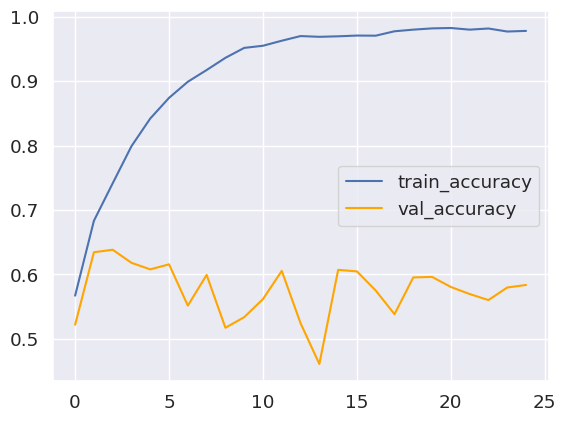

In [102]:
acc =  history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(acc, 'b', label = 'train_accuracy')
plt.plot(val_acc, 'orange', label = 'val_accuracy')

plt.legend()
plt.show()

In [103]:
model.evaluate(test_pad, test_label)

13/50 [======>.......................] - ETA: 0s - loss: 3.5025 - accuracy: 0.5577

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


50/50 [==============================] - 0s 9ms/step - loss: 3.3798 - accuracy: 0.5769


[3.3798367977142334, 0.5768749713897705]

Through the result, we can see that deep learning does not work that well here. 
To do the further analyze, I choose to set:

rating > 3: positive
rating <= 3: negative


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Data from Twitter

Since scraping the data from Twitter needed to buy an api key, here i use the data from: https://github.com/JAVAB3ANS/genshin-impact-social-media-toxicity-research/blob/master/%23boycottgenshin.csv


In [105]:
import pandas as pd
tw_df = pd.read_csv('#boycottgenshin.csv')
tw_df

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,ACCOUNT NAME,TWEET LINK,TWEET,TWEET DATE,RETWEET COUNTS,FAVORITES,REPLIES,QUOTES,FAVORITED,RETWEETED
0,hxg_diluc,https://twitter.com/hxg_diluc/status/154131277...,"No, the veil is removed",2022-06-27,180,3063,167,2246,False,False
1,smearstroke,https://twitter.com/smearstroke/status/1574726...,Why is this labeled as an enemy? He is just ap...,2022-09-27,0,2,0,1,False,False
2,Geoff_pole,https://twitter.com/Geoff_pole/status/15697298...,"@Luckgim @GenshinImpact You should, we all sho...",2022-09-13,0,1,1,0,False,False
3,eenvvyyy,https://twitter.com/eenvvyyy/status/1546793054...,Ignore all the stupid kids. At the end of the ...,2022-07-12,0,3,0,1,False,False
4,TheJackalMan7,https://twitter.com/TheJackalMan7/status/15719...,@pcgamer I'll be excited after they un-whitewa...,2022-09-19,0,1,0,0,False,False
...,...,...,...,...,...,...,...,...,...,...
9878,gwenstephanite,https://twitter.com/gwenstephanite/status/1379...,Attend ok #boycottgenshinimpact ???????? On pe...,2021-04-06,1,2,0,0,False,False
9879,quihl,https://twitter.com/quihl/status/1379473993846...,#boycottgenshinimpact mds eu nem joguei ainda,2021-04-06,0,0,0,0,False,False
9880,IchigoSaeko,https://twitter.com/IchigoSaeko/status/1379465...,Je comprend rien au #boycottgenshinimpact là,2021-04-06,0,0,1,0,False,False
9881,kamidozap,https://twitter.com/kamidozap/status/137944924...,se for pra boicotar genshin que boicotem pq el...,2021-04-06,0,1,0,0,False,False


In [106]:
tw_df['TWEET DATE'] # data is from 2021.4.6- 2022.6.27

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0       2022-06-27
1       2022-09-27
2       2022-09-13
3       2022-07-12
4       2022-09-19
           ...    
9878    2021-04-06
9879    2021-04-06
9880    2021-04-06
9881    2021-04-06
9882    2021-04-06
Name: TWEET DATE, Length: 9883, dtype: object

In [107]:
# focus on the text part 
text_data = tw_df['TWEET']

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [108]:
text_data

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0                                 No, the veil is removed
1       Why is this labeled as an enemy? He is just ap...
2       @Luckgim @GenshinImpact You should, we all sho...
3       Ignore all the stupid kids. At the end of the ...
4       @pcgamer I'll be excited after they un-whitewa...
                              ...                        
9878    Attend ok #boycottgenshinimpact ???????? On pe...
9879        #boycottgenshinimpact mds eu nem joguei ainda
9880         Je comprend rien au #boycottgenshinimpact là
9881    se for pra boicotar genshin que boicotem pq el...
9882    Les #boycottgenshinimpact #boycottgenshin qu'e...
Name: TWEET, Length: 9883, dtype: object

In [109]:
import pandas as pd 
import re
from textblob import TextBlob
import matplotlib.pyplot as plt 
import nltk

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [110]:
import re
import string
import nltk

nltk.download('stopwords')
nltk.download('words')
nltk.download('punkt')


from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords



# function to remove emojis
def de_emojify(text):
    regex_pattern = re.compile(pattern = "[" 
        u"\U0001F600-\U0001F64F"  
        u"\U0001F300-\U0001F5FF"  
        u"\U0001F680-\U0001F6FF"  
        u"\U0001F1E0-\U0001F1FF"  
                        "]+", flags = re.UNICODE)
    return regex_pattern.sub(r'',text)



def clean_text(text):
    if type(text) == float:
        return ""
    text = de_emojify(text).lower()
    # remove urls
    text = re.sub(r"http\S+", "", text)
    # remove HTML tags
    text = re.sub(r"<.*?>", "", text)
    # remove punctuation and lowercase all words
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    # tokenize the text and remove non-alphabetic tokens and stopwords
    tokens = word_tokenize(text)
    words = set(nltk.corpus.words.words())
    tokens = [word for word in tokens if word.isalpha()]
    tokens = [word for word in tokens if word.lower() in words or not word.isalpha()]
    tokens = [word for word in tokens if word.lower() not in stopwords.words('english')]
    # join tokens back into string
    text = " ".join(tokens)
    return text


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [111]:
import pandas as pd

# apply the clean_text function to the 'TWEET' column
tw_df['clean_tweet'] = tw_df['TWEET'].apply(lambda x: clean_text(x))

# check the updated dataframe
print(tw_df.head())

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


    ACCOUNT NAME                                         TWEET LINK  \
0      hxg_diluc  https://twitter.com/hxg_diluc/status/154131277...   
1    smearstroke  https://twitter.com/smearstroke/status/1574726...   
2     Geoff_pole  https://twitter.com/Geoff_pole/status/15697298...   
3       eenvvyyy  https://twitter.com/eenvvyyy/status/1546793054...   
4  TheJackalMan7  https://twitter.com/TheJackalMan7/status/15719...   

                                               TWEET  TWEET DATE  \
0                            No, the veil is removed  2022-06-27   
1  Why is this labeled as an enemy? He is just ap...  2022-09-27   
2  @Luckgim @GenshinImpact You should, we all sho...  2022-09-13   
3  Ignore all the stupid kids. At the end of the ...  2022-07-12   
4  @pcgamer I'll be excited after they un-whitewa...  2022-09-19   

   RETWEET COUNTS  FAVORITES  REPLIES  QUOTES  FAVORITED  RETWEETED  \
0             180       3063      167    2246      False      False   
1               0     

In [112]:
import pandas as pd
from textblob import TextBlob

def analyze_sentiment(df):
    df["sentiment"] = df["clean_tweet"].apply(lambda x: TextBlob(x).sentiment.polarity)
    df["sentiment"] = df["sentiment"].apply(lambda x: "positive" if x > 0 else ("neutral" if x == 0 else "negative"))
    return df

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [113]:
full_tw_df = analyze_sentiment(tw_df)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


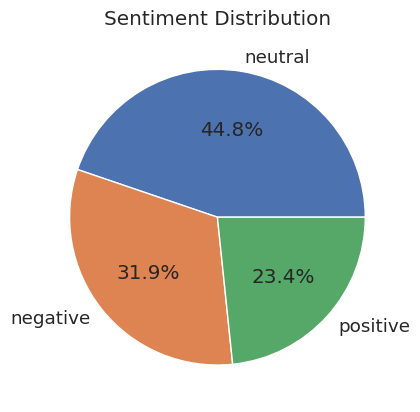

In [114]:
import matplotlib.pyplot as plt

# Count the number of occurrences of each sentiment
sentiment_counts = full_tw_df['sentiment'].value_counts()

# Create a pie plot
plt.pie(sentiment_counts.values, labels=sentiment_counts.index, autopct='%1.1f%%')
plt.title('Sentiment Distribution')
plt.show()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
